Idk

In [3]:
import numpy as numpy
import pandas as pd
import matplotlib as mpl
import sklearn.linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Features we were given
hog_pca = pd.read_csv("train/Features/hog_pca.csv")
color_hist = pd.read_csv("train/Features/color_histogram.csv")
additional_features = pd.read_csv("train/Features/additional_features.csv")
train_metadata = pd.read_csv("train/Features/train_metadata.csv")

In [5]:
hog_pca_test = pd.read_csv("test/Features/hog_pca.csv")
color_hist_test = pd.read_csv("test/Features/color_histogram.csv")
additional_features_test = pd.read_csv("test/Features/additional_features.csv")
test_metadata = pd.read_csv("test/Features/test_metadata.csv")

In [37]:
sum(color_hist.loc[0][1:]**2)

2.999999926845611

In [6]:
class_ids = train_metadata["ClassId"]
test_ids = test_metadata["id"]
test_ids


0        661
1       4477
2       1046
3        631
4       6533
        ... 
2348    2218
2349    4952
2350    1394
2351    3161
2352    1169
Name: id, Length: 2353, dtype: int64

In [7]:
hog_pca = hog_pca.drop("image_path", axis = 1)
hog_pca_test = hog_pca_test.drop("image_path", axis = 1)
hog_pca

,hog_pca_0,hog_pca_1,hog_pca_2,hog_pca_3,hog_pca_4,hog_pca_5,hog_pca_6,hog_pca_7,hog_pca_8,hog_pca_9,hog_pca_10,hog_pca_11,hog_pca_12,hog_pca_13,hog_pca_14,hog_pca_15,hog_pca_16,hog_pca_17,hog_pca_18,hog_pca_19
0,-0.763458,0.927880,0.264329,-0.638673,0.831455,-0.527469,-0.959387,-0.538355,1.262615,-0.245512,-0.439643,-1.485862,-0.892584,-0.455376,-0.979620,0.450825,-0.213796,-0.882416,-0.309656,0.271686
1,1.049284,3.608200,-1.817190,0.904380,-0.282195,0.623239,-0.510430,-0.388628,-0.457727,-0.033302,-0.190342,0.210740,-0.011180,0.138000,0.101737,-0.335682,-0.886182,0.507969,0.006536,0.471807
2,-1.552440,-0.432374,-0.318422,0.671877,-0.381869,-0.224374,0.565182,0.267907,0.144193,-0.150904,0.521769,0.328718,-0.357041,-0.192591,0.377116,0.501386,-0.421448,0.081289,0.730258,-0.205895
3,-1.556871,0.214406,0.973758,0.613876,-0.657341,0.007032,0.140899,-0.159095,-0.187679,-0.142929,0.948256,-0.115478,0.146324,-0.296778,-0.595600,0.285638,-0.481589,-0.101580,-0.139084,0.586276
4,-0.944294,-0.334833,0.415215,-0.607014,-1.004900,0.172754,-0.692467,-0.193404,1.385177,-0.230809,1.007779,-0.219087,0.420509,-0.053858,0.601939,-0.520063,0.062209,0.248771,0.140214,0.292198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,-0.562495,0.643567,0.254784,-1.583481,0.202211,1.504130,0.263140,0.253128,0.480586,-0.309651,-0.842139,-0.119560,0.169551,0.016671,-0.143923,-0.141590,0.172979,-0.356541,-0.167192,-0.452964
5484,-1.370223,-0.398313,0.378050,0.168035,-0.212531,-0.341123,-0.318070,-0.342226,0.765626,-0.362583,-0.096614,-0.411194,-0.047927,-0.044189,0.388909,-0.294122,-0.072038,0.171852,-0.131252,0.146278
5485,-1.951729,-1.117028,-1.187795,0.350751,-0.016377,-0.663806,0.582249,-0.877313,-0.562128,-0.194185,0.165496,0.204292,0.056600,0.439432,0.459455,-0.542944,0.056787,-0.252209,-0.082190,-0.157411
5486,-2.264590,-1.266415,-0.831067,0.579172,-0.497001,-0.237512,-0.715835,0.255480,-0.007029,-0.222388,-0.312279,-0.305216,0.010809,0.408131,-0.286114,0.211036,-0.284097,0.555815,-1.190879,0.073978


Serious class imbalance: but I think I'm just gonna 

In [8]:
stratified = hog_pca.groupby(class_ids).apply(lambda x: x.sample(29))
stratified_labels = stratified.index.get_level_values(0)


In [9]:
logReg = sklearn.linear_model.LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000)
logReg.fit(stratified, stratified_labels)

LogisticRegression(max_iter=10000, multi_class='multinomial', penalty='l1',
                   solver='saga')

In [10]:
logReg.coef_

array([[-7.13273806e-01, -1.40418375e+00,  7.89360947e-01,
         2.21582821e+00, -1.64701544e-01, -7.49633820e-01,
         0.00000000e+00, -7.21332347e-01, -1.29814737e+00,
         0.00000000e+00, -1.86792210e+00, -1.03702483e+00,
         8.81482502e-02, -1.13264458e+00, -2.04391585e+00,
         0.00000000e+00,  1.80002222e+00, -8.35614445e-01,
         0.00000000e+00,  9.65512747e-01],
       [-1.26928506e+00,  0.00000000e+00, -4.05312589e-01,
         3.59738670e-01, -1.81570439e+00, -2.04694495e+00,
         1.09470043e-01,  0.00000000e+00, -8.25373442e-01,
        -2.10218626e+00, -1.07493163e+00,  9.21686235e-01,
         4.16174068e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.19120639e+00, -3.26851398e-01,
         0.00000000e+00, -8.63585048e-01],
       [-2.37729584e+00,  9.59734890e-01,  3.15021522e-01,
         1.01845107e+00,  0.00000000e+00, -6.38074434e-01,
         3.00915242e-01, -1.67749427e-01, -2.17095231e+00,
        -2.32982712e+00, -3.3

In [14]:
param_grid = {'C': [7, 7.2, 7.5, 7.8, 8]}
logReg = sklearn.linear_model.LogisticRegression(
    penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000, n_jobs=-1
)
clf = GridSearchCV(logReg, param_grid, cv=5)
clf.fit(stratified, stratified_labels)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000,
                                          multi_class='multinomial', n_jobs=-1,
                                          penalty='l1', solver='saga'),
             param_grid={'C': [7, 7.2, 7.5, 7.8, 8]})

<Axes: >

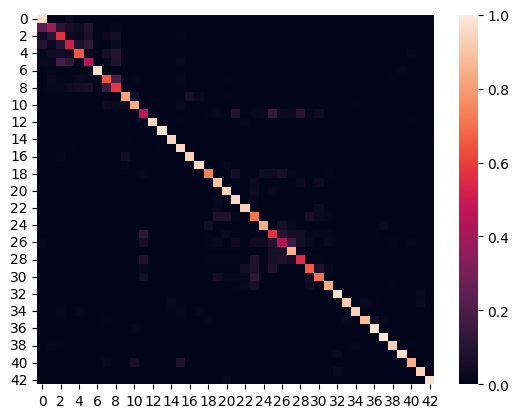

In [15]:
best_logReg = clf.best_estimator_
hog_pca_confusion_matrix = confusion_matrix(class_ids, best_logReg.predict(hog_pca), normalize='true')
sns.heatmap(hog_pca_confusion_matrix)

In [94]:
print(len(hog_pca_confusion_matrix))
class_accuracies = sorted((hog_pca_confusion_matrix[i][i], i) for i in range(43))

43


In [95]:
def printSigns(accuracies, top_n, reverse=False):
    if reverse == True:
        accuracies = list(reversed(accuracies))
    for i in range(top_n):
        classID = accuracies[i][1]
        mpl.pyplot.subplot(2,top_n//2, i + 1)
        img = mpl.image.imread(f'Sign Images/{classID}.png')
        mpl.pyplot.imshow(img)
    mpl.pyplot.show()


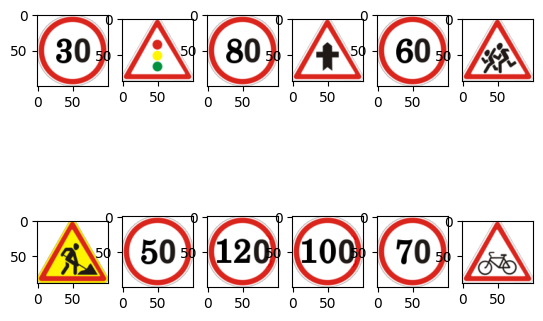

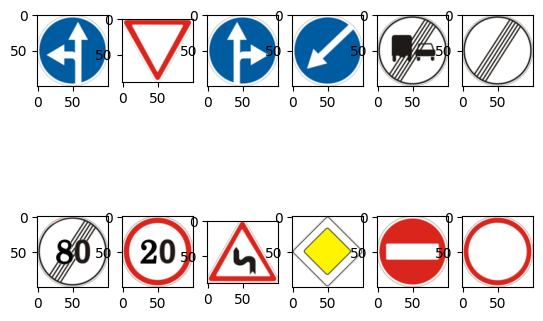

In [101]:
printSigns(class_accuracies, 12)
printSigns(class_accuracies, 12, reverse=True)

In [ ]:
output = pd.DataFrame()
output["id"] = test_ids
output["ClassId"] = logReg.predict(hog_pca_test)
output.to_csv("output.csv", index=False)

In [ ]:
param_grid2 = {'C': [1,8, 9, 11, 20]}
logReg = sklearn.linear_model.LogisticRegression(
    penalty='l1', solver='saga', multi_class='ovr', max_iter=10000, n_jobs=-1
)
oneRest = GridSearchCV(logReg, param_grid, cv=5)
oneRest.fit(stratified, stratified_labels)

In [102]:
oneRest.cv_results_

{'mean_fit_time': array([3.87631416, 5.62362866, 5.43339167, 5.00427985, 5.52846384]),
 'std_fit_time': array([0.99953752, 1.14147169, 0.41952027, 0.63429331, 1.1543467 ]),
 'mean_score_time': array([0.00359201, 0.00279222, 0.00439682, 0.00298786, 0.00358877]),
 'std_score_time': array([0.00173673, 0.00040035, 0.00182821, 0.00088671, 0.00079839]),
 'param_C': masked_array(data=[7, 7.2, 7.5, 7.8, 8],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 7}, {'C': 7.2}, {'C': 7.5}, {'C': 7.8}, {'C': 8}],
 'split0_test_score': array([0.66, 0.66, 0.66, 0.66, 0.66]),
 'split1_test_score': array([0.728, 0.728, 0.732, 0.732, 0.728]),
 'split2_test_score': array([0.6626506 , 0.6626506 , 0.65863454, 0.65863454, 0.65863454]),
 'split3_test_score': array([0.65060241, 0.65060241, 0.65060241, 0.65461847, 0.65863454]),
 'split4_test_score': array([0.70281124, 0.70281124, 0.70281124, 0.70281124, 0.70281124]),
 'mean_test_score': 

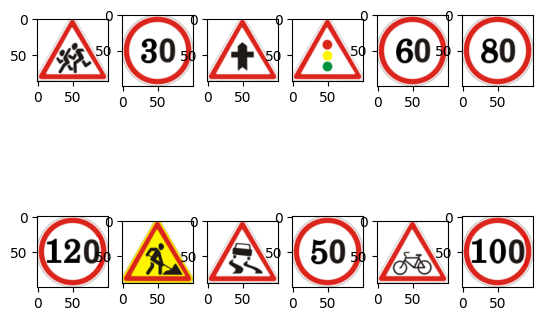

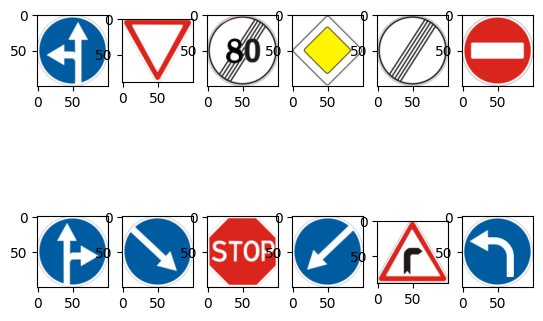

In [99]:
ovr_logReg = oneRest.best_estimator_
ovr_confusion_matrix = confusion_matrix(class_ids, ovr_logReg.predict(hog_pca), normalize='true')
ovr_accuracies = sorted((ovr_confusion_matrix[i][i], i) for i in range(43))
printSigns(ovr_accuracies, 12)
printSigns(ovr_accuracies, 12, True)